In [12]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

%matplotlib inline

In [19]:
import torch
import torchvision
from torchvision import transforms, datasets

#  Классификатор пиццы
Предлагаю вам собственноручно реализовать бинарный классификатор, который определяет - является ли еда на картинке пиццей или нет. Вы уже знаете как писать простейший классификатор, а еще мы только что прошли новые типы слоев, которые применяются для эффективной работы с картинками (torch.nn.Conv2d, torch.nn.MaxPool2d, torch.nn.BatchNorm2d). 

Сейчас вам предстоит с помощью торча написать модель нейросети, а так же процесс её обучения. Пользуйтесь вчерашними/сегодняшними ноутбуками, гуглом или спрашивайте меня если у вас возникают вопросы.

Загрузку батчей осуществляется с помощью даталоадера - благодаря нему данные в датасете можно сразу привести к единообразному виду. Пример использования описан в конце предыдущего ноутбука.

Сперва скачайте датасет с картинками пиццы из телеграма, загрузите его на гугл диск и укажите до папки pizza_not_pizza верный путь (т.е. укажите путь до папки в которой есть две папки pizza и not_pizza).

In [20]:
from google.colab import drive
drive.mount("/content/gdrive")

!unzip /content/gdrive/MyDrive/ssyp/data/pizza_not_pizza.zip # эта команда распакует zip файл в папку с аналогичным названием
                                                             # гугл делает это локально, т.е. на диске ничего не распакуется

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/MyDrive/ssyp/data/pizza_not_pizza.zip
replace pizza_not_pizza/not_pizza/1005746.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [25]:
dataset = datasets.ImageFolder(root='pizza_not_pizza',
       transform=transforms.Compose([
       transforms.Resize(size=[64,64]),
       transforms.RandomHorizontalFlip(),
       transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
]))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [30]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16,
                                         shuffle=True, num_workers=2)

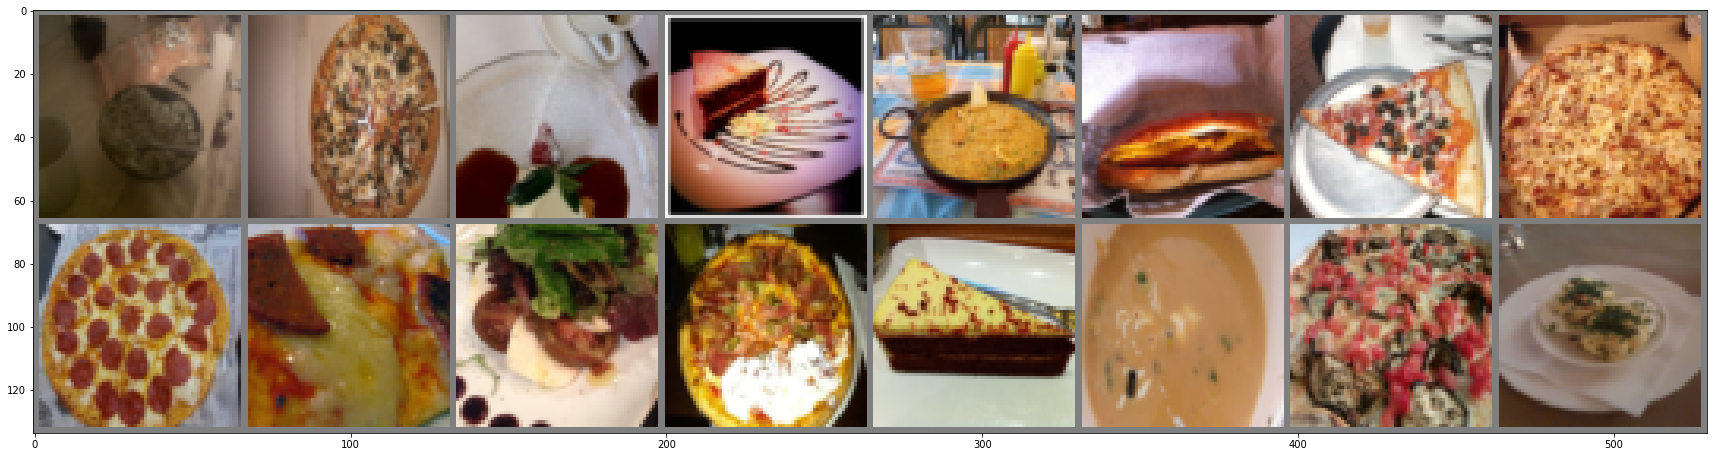

In [31]:
def imshow(img): # функция для показа изображения
    img = img / 2 + 0.5 # нормализация: [-1,1] --> [0,1]
    npimg = img.numpy()
    plt.figure(figsize = (30,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# вытащим батч изображений из даталоадера
dataiter = iter(dataloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

# Строим классификатор
удачи!